## Installing the opencv library

In [4]:
!pip install opencv-python

## Importing necessary libraries

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import cv2
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### **MasterImage** class
##### For reading the images from the folders in the cassava dataset directory.
##### Each class is a folder in the directory.
##### All files in each folder is given the folder's name.
##### The label(s) are named after the folder.

##### There are 5 label(s):
    - bacteria blight
    - brown streak disease
    - green mite
    - mosaic disease
    - healthy

In [6]:
class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data
class MasterImage2(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

### Reading the image from the image folder

In [7]:
cassava_train = MasterImage(PATH='images')

### Loading the image folders into images and labels

In [8]:
(train_images, train_label) = cassava_train.load_dataset()

Reading Dataset from PIckle Object


#### The shape of the data

In [9]:
train_images.shape

(5655, 50, 50, 3)

In [10]:
# print(len(train_label[train_label == 0]))
# print(len(train_label[train_label == 1]))
# print(len(train_label[train_label == 2]))
# print(len(train_label[train_label == 3]))
# print(len(train_label[train_label == 4]))

##### Image categories

In [11]:
# Cassava categories
cassava_train.get_categories()

Found Categories  ['cassava bacteria blight', 'cassava brown streak virus', 'cassava green mite', 'cassava mosaic disease', 'healthy'] 



['cassava bacteria blight',
 'cassava brown streak virus',
 'cassava green mite',
 'cassava mosaic disease',
 'healthy']

#### Splitting the image dataset into training and testing data

In [12]:
(train_images ,test_images, train_labels, test_labels) = train_test_split(train_images, train_label, test_size=0.2, random_state=23)

In [13]:
print(len(train_images))
print(len(test_images))

4524
1131


##### Normalizing the image array by dividing by 255

In [14]:
# Normalization
x_train = train_images/255.0
x_test = test_images/255.0

##### Reshaping the image arrays as machine learning can only work with 2D data..

In [15]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array

# train images reshaping
nsamples, nx, ny, nrgb = x_train.shape
x_train_2 = x_train.reshape((4524,50*50*3))

# test images reshaping
nsamples, nx, ny, nrgb = x_train.shape
x_test_2 = x_test.reshape((1131,50*50*3))

#### New shape 

In [16]:
# checking to see the new dimension
x_test_2.shape

(1131, 7500)

##### Sample image

4

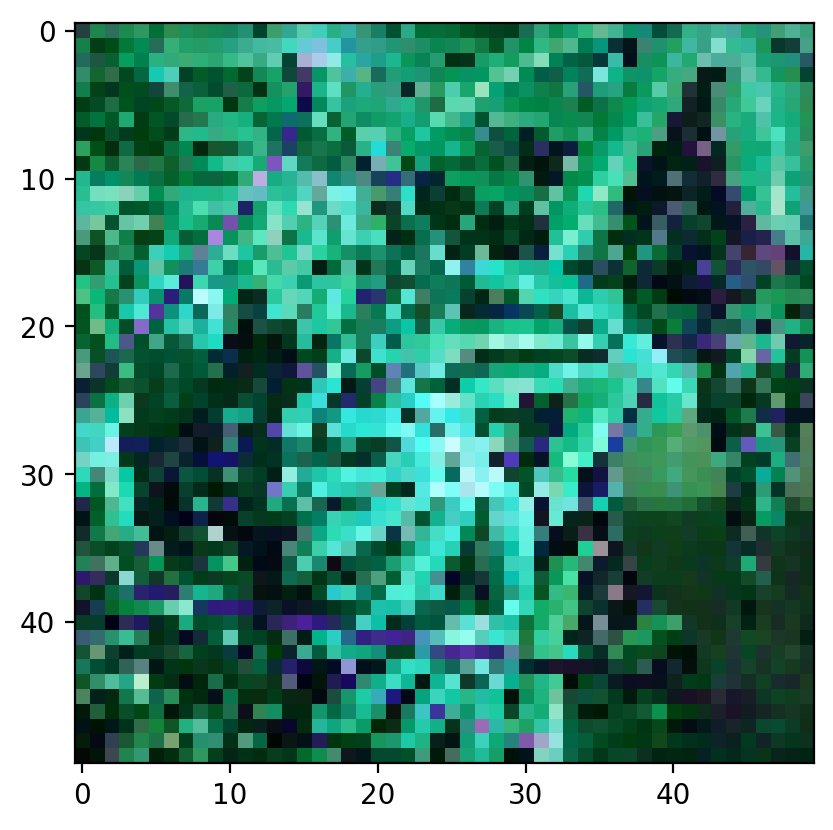

In [17]:
plt.imshow(x_train[0]*255)
train_label[0]

## BUILDING THE MODEL

## **Algorithms to be used**:

####    - RANDOM FOREST
            Random forest is a commonly-used machine learning algorithm which combines the output of multiple decision trees
            to reach a single result.

####    - NAIVE BAYES
            It is the most fundamental machine learning classifier, also abbreviated as NB. 
            It works based on Bayes Theorem and has independent features.
####    - K-NEAREST NEIGHBOR 
            KNN stands for K-Nearest neighbours. It is also an algorithm popularly used for multi-class classification.
            It is implemented in sklearn using KNeighborsClassifier class.

## RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [19]:
model_rf.fit(x_train_2,train_labels)

RandomForestClassifier()

In [20]:
y_pred_rf = model_rf.predict(x_test_2)
y_pred_rf

array([3, 3, 1, ..., 1, 3, 3])

In [21]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_rf,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_rf,test_labels)))

accuracy:
  0.537577365163572


classification report:
               precision    recall  f1-score   support

           0       0.06      0.86      0.11         7
           1       0.30      0.49      0.37       160
           2       0.01      0.33      0.03         6
           3       0.96      0.54      0.70       958
           4       0.00      0.00      0.00         0

    accuracy                           0.54      1131
   macro avg       0.27      0.44      0.24      1131
weighted avg       0.86      0.54      0.64      1131



c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("confusion matrix: ")
confusion_matrix(y_pred_rf,test_labels)

confusion matrix: 


array([[  6,   1,   0,   0,   0],
       [ 38,  78,  14,  19,  11],
       [  1,   2,   2,   1,   0],
       [ 62, 183, 131, 522,  60],
       [  0,   0,   0,   0,   0]], dtype=int64)

## NAIVE BAYES

In [23]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()

In [24]:
model_nb.fit(x_train_2,train_labels)

GaussianNB()

In [25]:
y_pred_nb = model_nb.predict(x_test_2)
y_pred_nb

array([0, 0, 0, ..., 4, 2, 3])

In [26]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_nb,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_nb,test_labels)))

accuracy:
  0.28824049513704686


classification report:
               precision    recall  f1-score   support

           0       0.42      0.21      0.28       211
           1       0.11      0.29      0.16       104
           2       0.24      0.16      0.19       224
           3       0.35      0.65      0.46       291
           4       0.37      0.09      0.14       301

    accuracy                           0.29      1131
   macro avg       0.30      0.28      0.25      1131
weighted avg       0.32      0.29      0.26      1131



In [27]:
print("confusion matrix: ")
confusion_matrix(y_pred_nb,test_labels)

confusion matrix: 


array([[ 45,  53,  23,  79,  11],
       [  4,  30,  17,  40,  13],
       [ 26,  37,  35, 119,   7],
       [  9,  40,  38, 190,  14],
       [ 23, 104,  34, 114,  26]], dtype=int64)

## K NEAREST NEIGHBOR(KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)

In [29]:
model_knn.fit(x_train_2,train_labels)

KNeighborsClassifier(n_neighbors=7)

In [30]:
y_pred_knn = model_knn.predict(x_test_2)
y_pred_knn

c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, ..., 0, 1, 1])

In [31]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_knn,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_knn,test_labels)))

accuracy:
  0.28735632183908044


classification report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25       106
           1       0.72      0.24      0.36       778
           2       0.11      0.24      0.15        68
           3       0.17      0.57      0.26       159
           4       0.03      0.10      0.04        20

    accuracy                           0.29      1131
   macro avg       0.25      0.28      0.21      1131
weighted avg       0.55      0.29      0.32      1131



In [35]:
print("confusion matrix: ")
confusion_matrix(y_pred_knn,test_labels)

confusion matrix: 


array([[ 27,  24,   7,  41,   7],
       [ 65, 189, 102, 376,  46],
       [  4,  16,  16,  27,   5],
       [  8,  30,  19,  91,  11],
       [  3,   5,   3,   7,   2]], dtype=int64)

## **FINDING** AND **COMPARING** THE THREE ALGORITHMS:
####      - **GridSearchCv**
####    - Plotting graph using **Seaborn**

#### Using **GRID SEARCH CV** and **SHUFFLESPLIT** to find the best model and showing as a DataFrame

In [41]:
# Finding the best model score by using Grid search cv an shuffle split
# Defining the find_best_model function and passing in the dictionary containing the parameters to change.

# import necessary libraries
from sklearn.model_selection import ShuffleSplit, GridSearchCV

# defining the function
def find_best_model(x,y):
        algos = {
            'Random Forest':{
            'model': RandomForestClassifier(),
            'params': {
            'criterion':['gini','entropy'],
            'n_estimators':[20,50],
            'max_features':['auto','sqrt'],
            'class_weight':['balanced','balanced_subsample']
                }
            },
            'K Nearest Neighbor':{
                  'model':KNeighborsClassifier(),
                  'params':{
                  'n_neighbors':[5, 10],
                  'algorithm':['auto', 'kd_tree']
                }

            },
            'Gaussian Naive Bayes':{
                  'model':GaussianNB(),
                  'params': {'var_smoothing': np.logspace(0,-9, num=2)}
            }
        }
        scores = []
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
        for algo_name,config in algos.items():
            gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
            gs.fit(x,y)
            scores.append({
                'model':algo_name,
                'best_score':gs.best_score_,
                'best_params':gs.best_params_
            })
        return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [42]:
# calling the function on our train images and train labels
find_best_model(x_train_2, train_labels)

c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,model,best_score,best_params
0,Random Forest,0.504972,"{'class_weight': 'balanced_subsample', 'criter..."
1,K Nearest Neighbor,0.312044,"{'algorithm': 'auto', 'n_neighbors': 10}"
2,Gaussian Naive Bayes,0.276464,{'var_smoothing': 1e-09}


#### By plotting the **RESULTS** of the accuracy using seaborn.

In [43]:
acc_dict = {
        "Random Forest":accuracy_score(y_pred_rf,test_labels)*100,
        "naive_bayes":accuracy_score(y_pred_nb,test_labels)*100,
        "knn":accuracy_score(y_pred_knn,test_labels)*100
        }

<AxesSubplot:>

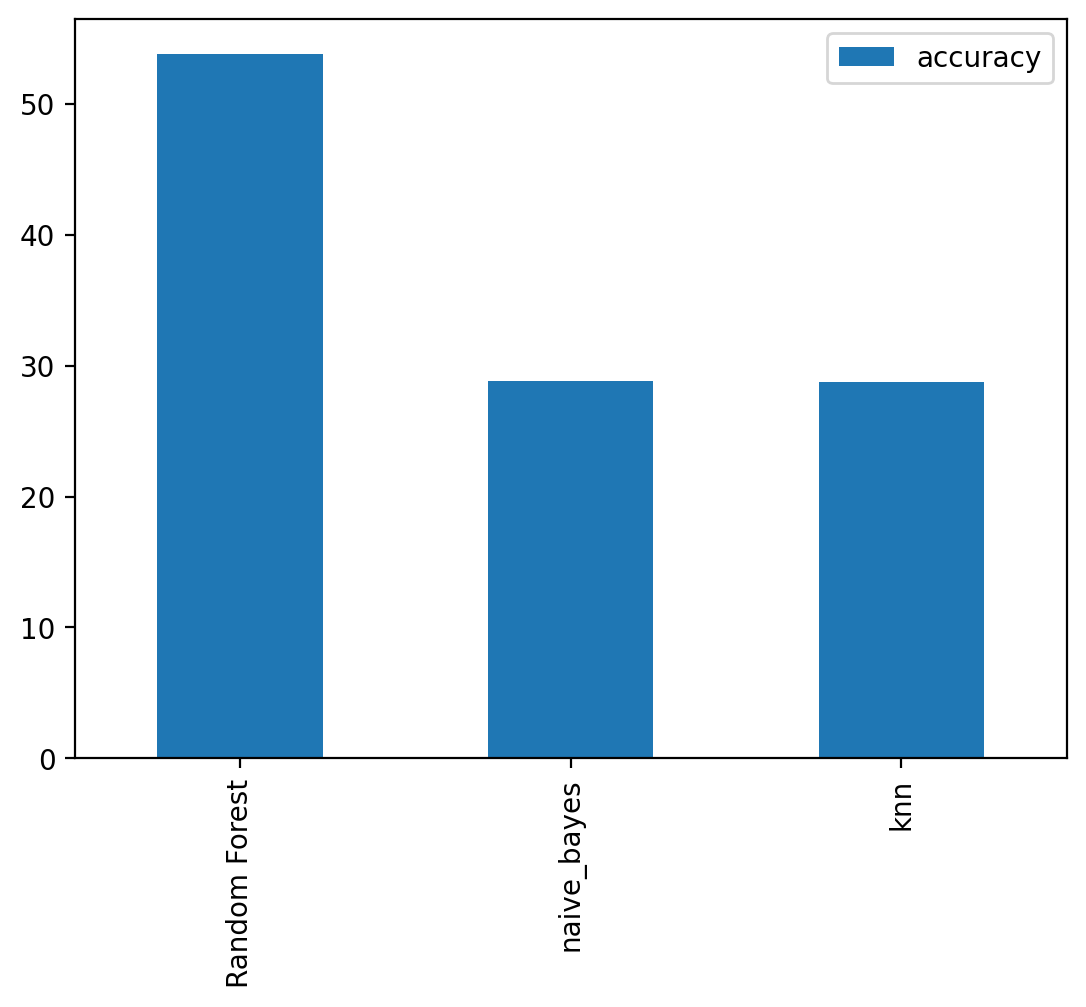

In [44]:
pd.DataFrame(acc_dict.values(), index=acc_dict.keys(), columns=["accuracy"]).plot(kind='bar')

#### From the graph above, it clearly shows that the **RANDOM FOREST** 
#### algorithm is the most suitable for the classification task.